In [13]:
#D'abord vérifier si on a du Lenet


In [1]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import time
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def build_model(width, height, depth, classes):
	# initialize the input shape and channels dimension to be
	# "channels last" ordering
	inputShape = (height, width, depth)
	chanDim = -1
	# build the model using Keras' Sequential API
	model = Sequential([
		# CONV => RELU => BN => POOL layer set
		Conv2D(16, (3, 3), padding="same", input_shape=inputShape),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),
		# (CONV => RELU => BN) * 2 => POOL layer set
		Conv2D(32, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(32, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),
		# (CONV => RELU => BN) * 3 => POOL layer set
		Conv2D(64, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(64, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(64, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),
		# first (and only) set of FC => RELU layers
		Flatten(),
		Dense(256),
		Activation("relu"),
		BatchNormalization(),
		Dropout(0.5),
		# softmax classifier
		Dense(classes),
		Activation("softmax")
	])
	# return the built model to the calling function
	return model

In [3]:
#Essayons de faire lenet avec tf voir ci-dessous . Il y a aussi une commande pour voir le résumer peut être .resume
def build_model(width, height, depth, classes,drop_out_rate):
	# initialize the input shape and channels dimension to be
	# "channels last" ordering
	inputShape = (height, width, depth)
	chanDim = -1
	# build the model using Keras' Sequential API
	model = Sequential([
		# CONV => RELU => BN => POOL layer set
		Conv2D(30, (5, 5), padding="same", input_shape=inputShape),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),
        
		# (CONV => RELU => BN) * 2 => POOL layer set
		Conv2D(16, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),

        
		# first (and only) set of FC => RELU layers
		Flatten(),
		Dense(128),
		Activation("relu"),
		BatchNormalization(),
		Dropout(drop_out_rate),
        
		# softmax classifier
		Dense(classes),
		Activation("softmax")
	])
	# return the built model to the calling function
	return model

In [4]:
  
    
    lenet = Sequential()

    conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

    max_pool_1 = MaxPooling2D(pool_size = (2, 2))

    conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

    max_pool_2 = MaxPooling2D(pool_size = (2, 2))

    flatten = Flatten()

    dropout = Dropout(rate = dropout_rate)

    dense_1 = Dense(units = 128,
                activation = 'relu')

    dense_2 = Dense(units = 6,
                activation = 'softmax')

    lenet.add(conv_1)
    lenet.add(max_pool_1)
    lenet.add(conv_2)
    lenet.add(max_pool_2)
    lenet.add(dropout)
    lenet.add(flatten)
    lenet.add(dense_1)
    lenet.add(dense_2)

NameError: name 'dropout_rate' is not defined

In [5]:
import pandas as pd
df=pd.read_csv("/home/marcpozzo/Desktop/c3po/Images_aquises/generateur.csv")
df=df[(df["class"]=='corneille') | (df["class"]=='pigeon') | (df["class"]=='faisan')   ]
df.drop('labels',inplace=True,axis=1)
df.head()

,class,img_paths
2,corneille,Rec_images/DSCF0180_corneille_2.JPG
3,corneille,Rec_images/DSCF0180_corneille_3.JPG
4,pigeon,Rec_images/DSCF0258_pigeon_4.JPG
8,pigeon,Rec_images/DSCF0335_pigeon_8.JPG
10,pigeon,Rec_images/DSCF0341_pigeon_10.JPG


In [6]:
#Paramètres

#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.2
epochs=200
batch_size = 600
zoom_range = 1.25
horizontal_flip = True
Minimum_Number_Class=100
dropout_rate=0.3
#steps_per_epoch=len(data_train)//batch_size
steps_per_epoch=1
#validation_steps=len(data_test)//batch_size
validation_steps=1


In [7]:

base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur_bigger.csv'

df=pd.read_csv(generateur_path)
df.drop('labels',inplace=True,axis=1)

df["class"].unique()
for c in df:
    print(''+c+':',len(df[c].unique()))
df["class"].unique()


All_Unique=df["class"].unique()
Utilisable=[]
for i in df["class"].unique():
    if df["class"][df["class"]==i].count()>Minimum_Number_Class:
        Utilisable.append(i)
Utilisable
Non_Utilisable=set(All_Unique)-set(Utilisable)
Non_Utilisable
for i in Non_Utilisable:
    df=df[df["class"]!=i]
df=df[df["class"]!="oiseau"]  
df["class"].unique()


for i in range(len(df["class"])):
    image_name=df["img_paths"].iloc[i]
    df["img_paths"].iloc[i]=os.path.join(base_img_paths,image_name)
    

class: 13
img_paths: 6220


In [9]:


#model.compile(optimizer='adam',
#                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
#                metrics=['accuracy'])

In [8]:
from numpy.random import seed
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
seed(1)
tf.random.set_seed(2)

data_train,data_test= train_test_split(df,stratify=df["class"], test_size=test_size,random_state=42)
train_data_generator = ImageDataGenerator(
        #preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        zoom_range = zoom_range,
        horizontal_flip = horizontal_flip
        )

test_data_generator = ImageDataGenerator()
    #preprocessing_function = preprocess_input)




train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = len(data_train) )


test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = len(data_test))

gen=train_generator[0]

x_train=gen[0]
y_train=gen[1]



gen_test=test_generator[0]

x_test=gen_test[0]
y_test=gen_test[1]


Using TensorFlow backend.


Found 4772 validated image filenames belonging to 6 classes.
Found 1194 validated image filenames belonging to 6 classes.


In [15]:
from numpy.random import seed


In [10]:
#seed(1)
tf.random.set_seed(2)
model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test))

NameError: name 'model' is not defined

Train on 4772 samples, validate on 1194 samples
Epoch 1/200
4772/4772 [==============================] - 3s 706us/sample - loss: 1.2703 - acc: 0.5953 - val_loss: 1.1944 - val_acc: 0.5913
Epoch 2/200
4772/4772 [==============================] - 3s 567us/sample - loss: 0.8039 - acc: 0.7513 - val_loss: 0.7747 - val_acc: 0.7437
Epoch 3/200
4772/4772 [==============================] - 3s 568us/sample - loss: 0.7599 - acc: 0.7554 - val_loss: 0.8747 - val_acc: 0.6499
Epoch 4/200
4772/4772 [==============================] - 3s 569us/sample - loss: 0.6840 - acc: 0.7766 - val_loss: 0.8242 - val_acc: 0.7663
Epoch 5/200
4772/4772 [==============================] - 3s 555us/sample - loss: 0.6144 - acc: 0.8104 - val_loss: 0.6598 - val_acc: 0.7864
Epoch 6/200
4772/4772 [==============================] - 3s 572us/sample - loss: 0.5587 - acc: 0.8198 - val_loss: 0.7574 - val_acc: 0.7806
Epoch 7/200
4772/4772 [==============================] - 3s 564us/sample - loss: 0.5578 - acc: 0.8225 - val_loss: 0.60

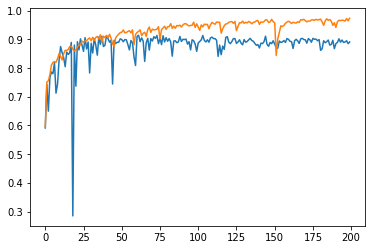

In [11]:
tf.random.set_seed(2)
model = build_model(28, 28, 3, 6,0.3)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["acc"])
history=model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test))

val_acc=history.history['val_acc']
acc=history.history['acc']

plt.plot(val_acc)
plt.plot(acc);

In [12]:
model.save('tf_model') 
#new_model = tf.keras.models.load_model('model_test)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: tf_model/assets


In [25]:
tf.random.set_seed(2)
model = build_model(28, 28, 3, 6,0.3)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["acc"])
history=model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Train on 4772 samples, validate on 1194 samples
Epoch 1/3
4772/4772 [==============================] - 3s 730us/sample - loss: 1.2703 - acc: 0.5953 - val_loss: 1.1944 - val_acc: 0.5913
Epoch 2/3
4772/4772 [==============================] - 3s 586us/sample - loss: 0.8039 - acc: 0.7513 - val_loss: 0.7747 - val_acc: 0.7437
Epoch 3/3
4772/4772 [==============================] - 3s 537us/sample - loss: 0.7599 - acc: 0.7554 - val_loss: 0.8747 - val_acc: 0.6499


In [ ]:
#history.history
#Pour 0.1 d epochs
#A partir de 170 epochs overfit
#Sinon stabil vers 0.9

In [21]:
from sklearn import metrics 
y_predict=model.predict(x_test).argmax(axis=1)
print(metrics.classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       723
           1       0.59      0.94      0.73        17
           2       0.88      0.88      0.88       216
           3       0.58      0.85      0.69        46
           4       0.63      0.61      0.62        36
           5       0.87      0.93      0.90       156

    accuracy                           0.90      1194
   macro avg       0.75      0.85      0.79      1194
weighted avg       0.91      0.90      0.90      1194



In [22]:
y_predict=model.predict(x_train).argmax(axis=1)
print(metrics.classification_report(y_predict,y_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2778
           1       0.99      0.99      0.99       109
           2       0.98      1.00      0.99       847
           3       0.97      1.00      0.98       262
           4       0.99      1.00      0.99       140
           5       0.95      0.99      0.97       636

    accuracy                           0.99      4772
   macro avg       0.98      0.99      0.99      4772
weighted avg       0.99      0.99      0.99      4772

